# Texture segmentation

This assignment covers simple texture segmentation using either Histogram model matching, point model distances, etc.
# New Section
The purpose is to some segment regions (wall, sky, roof, pathway) from this photography, using texture segmentation techniques:

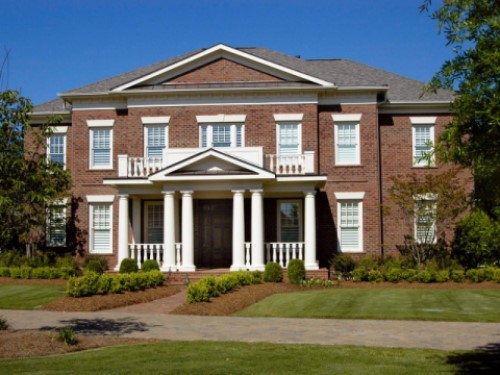

This assignment uses opencv (3+) and matplotlib.

# Setup



In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

root_ds = '.'

## Mounting Google Drive (Google Colab only)
First, we'll mount the distant Google Drive locally. We assume here you have created a shortcut `2020-MSAIMove_computervision_shared` pointing to the class shared folder.

Rather than downloading, distant mounting ensure fast access without need of download.

In [ ]:
if 'google.colab' in str(get_ipython()):
  import os
  from google.colab import drive
  drive.mount('/content/drive')

  root_ds = '/content/drive/MyDrive/2020-MSAIMove_computervision_shared/datasets/'
  assert(os.path.exists(root_ds))

Mounted at /content/drive


# Exercise

First, let's load the image (in BGR format), and compute its HSV encoding (Hue Saturation Value).

In [ ]:
imBGR = cv2.imread(os.path.join(root_ds, "../datasets/misc/house.jpg"))
# Convert to BGR to HSV
imHSV = cv2.cvtColor(imBGR, cv2.COLOR_BGR2HSV)

Let's plot the image. Remember we first need to reverse the color axis because Matplotlib uses RGB while OpenCV uses BGR. It is done with `array[..., ::-1]` where the `...` means *all axis until* and `::-1` means reverse order.

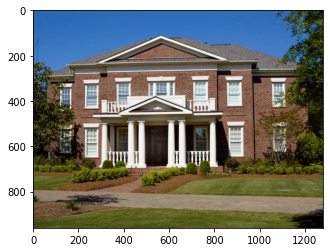

In [ ]:
plt.figure()
plt.imshow(imBGR[..., ::-1])

## Texture segmentation
**Let's try to segment the wall bricks.**

Here, you need to select a sub part of the image with `imHSV[y1:y2, x1:x2]` and compute its histogram. Computing the histogram is achieved with the `cv2.calcHist(image, channels, mask, sizes, ranges)`.
Where, `image` is the image on which to compute the histogram, `channels` is a list of channel index to compute the histogram on, `mask` of the image parameter generally set to None to compute the full image histogram, `sizes` a list of number of bins channel-wise, `ranges` a list of paired \[min,max\] values for the histogram.

Once the histogram is computed, you may compute the backprojection of the later on an image with `cv2.calcBackProject(image, channels, hist, ranges, scale)` where `channels` and `ranges` are similar as before, `image` is the image on which to apply backprojection, `scale` is a scaling factor of the function output (typically, 255).

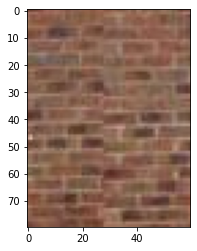

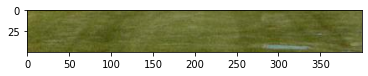

In [ ]:
# Segment brick
# Select a sub part of the image:
patch_wall = imHSV[300:380, 300:360]
patch_grass = imHSV[ 750:800 , 800:1200]
plt.figure()
plt.imshow(cv2.cvtColor(patch_wall, cv2.COLOR_HSV2BGR)[..., ::-1])#From BGR to RGB
plt.figure()
plt.imshow(cv2.cvtColor(patch_grass, cv2.COLOR_HSV2BGR)[..., ::-1])#From BGR to RGB

channels_wall = [0, 1]
sizes_wall = [180,256]
ranges_wall = [0,179,0,255]

channels_grass = [0, 1]
sizes_grass = [180,256]
ranges_grass = [0,179,0,255]

# Build a histogram (HSV):
hist_wall = cv2.calcHist([patch_wall], channels_wall, None, sizes_wall, ranges_wall)
cv2.normalize(hist_wall, hist_wall, 0, 255, cv2.NORM_MINMAX)
hist_grass = cv2.calcHist([patch_grass], channels_grass, None, sizes_grass, ranges_grass)
cv2.normalize(hist_grass, hist_grass, 0, 255, cv2.NORM_MINMAX)

#print(hist_wall.shape)
#plt.figure()
#plt.plot(hist_wall)

# Compute the histogram back projection:
lhMap_wall = cv2.calcBackProject([imHSV], channels_wall, hist_wall, ranges_wall, 255)
lhMap_grass = cv2.calcBackProject([imHSV], channels_grass, hist_grass, ranges_grass, 255)



Now we plot the likelihood map of the brick and grass for the current texture segmentation.

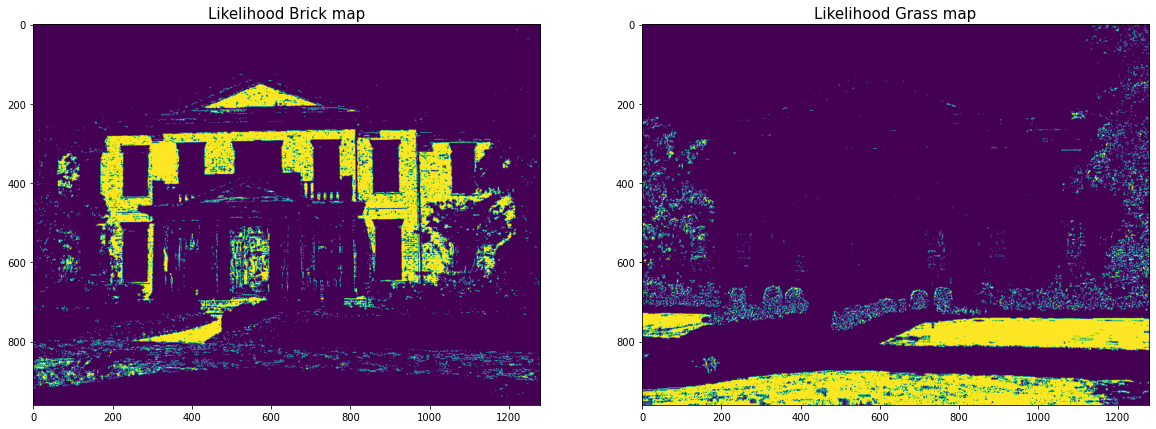

In [ ]:
plt.figure('dist',figsize=(20,20))
plt.subplot(1, 2, 1)
plt.imshow(lhMap_wall)
plt.title('Likelihood Brick map',size = 15)
plt.subplot(1, 2, 2)
plt.imshow(lhMap_grass)
plt.title('Likelihood Grass map',size = 15)

plt.draw()
plt.show()

In [ ]:
imBGR2 = cv2.imread(os.path.join(root_ds, "../datasets/misc/house.jpg"))

Once the image is load, we color the brick wall in red.
<br> Here, we cheat a bit by telling that there are no brick pixel for y > 700
<br> We can however observe some "holes" in the brick coloration which could be filling using gaussian blur or a mean kernel only activated by red color

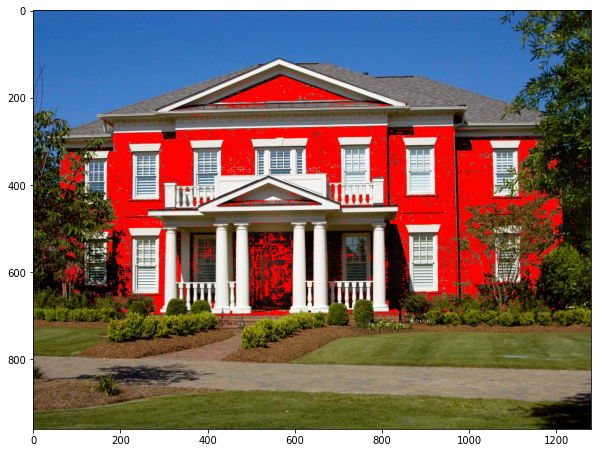

In [ ]:
imRGB2= cv2.cvtColor(imBGR2, cv2.COLOR_BGR2RGB)

for i in range(len(imRGB2)):
  for j in range (len(imRGB2[0])):
    if (lhMap_wall[i][j]>0 and i<700):
      imRGB2[i][j] = [255,0,0]

plt.figure(figsize=(10,10))
plt.imshow(imRGB2)

Now, We color the grass in blue

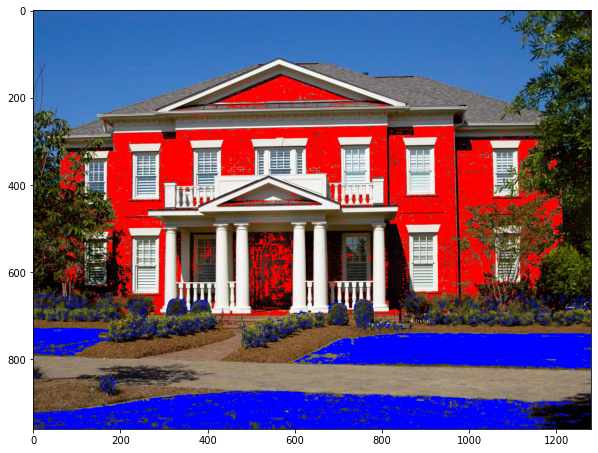

In [ ]:
plt.figure(figsize=(10,10))

for i in range(len(imRGB2)):
  for j in range (len(imRGB2[0])):
    if (lhMap_grass[i][j]>0 and i>650):
      imRGB2[i][j] = [0,0,255]

plt.imshow(imRGB2)

Here we calculate point distance to detect the sky pixels

In [ ]:
import math
def eDistance(t1,t2):
  dist = math.sqrt((t1[0] - t2[0])**2 + (t1[1] - t2[1])**2 + (t1[2] - t2[2])**2)
  return dist

Finally, we color the sky in green using point distance

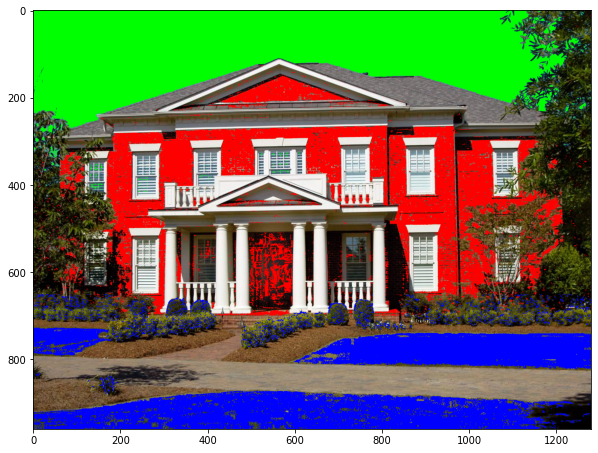

In [ ]:
for i in range(len(imRGB2)):
  for j in range (len(imRGB2[0])):
    if (eDistance(imRGB2[i][j],[ 45, 103, 177])<60):
      imRGB2[i][j] = [0,255,0]

plt.figure(figsize=(10,10))
plt.imshow(imRGB2)